In [1]:
from os import path
import numpy as np
import cv2
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import tensorflow as tf
tf.test.gpu_device_name()
from sklearn.model_selection import train_test_split


In [4]:
path = 'drive/Shared drives/539Final/'
# read iris.csv
#legend = pd.read_csv(path + 'legend.csv').to_numpy()
legend = pd.read_csv('legend.csv').to_numpy()


# split into label and identifiers
tmp_labels = legend[:, 2]
tmp_pic_names = legend[:, 1]
tmp_labels = np.array([i.lower() for i in tmp_labels])
print(tmp_pic_names.shape)

(13690,)


In [5]:
import os
from shutil import copyfile

name_train, name_test, label_train, label_test = train_test_split(tmp_pic_names, tmp_labels, test_size=0.3, random_state=0)

#Training Data Prep
folder = 'training_data/'
original_folder = 'images/'

#making the training folder
os.mkdir(folder)

for index in range(len(name_train)):
    folder_name = folder + label_train[index]
    orig_file_name = original_folder + name_train[index]
    new_file_name = folder_name + '/' + name_train[index]

    if os.path.exists(folder_name):
        copyfile(orig_file_name, new_file_name)
    else:
        os.mkdir(folder_name)

#Test Data Prep
folder = 'testing_data/'
original_folder = 'images/'

#making the training folder
os.mkdir(folder)

for index in range(len(name_test)):
    folder_name = folder + label_test[index]
    orig_file_name = original_folder + name_test[index]
    new_file_name = folder_name + '/' + name_test[index]

    if os.path.exists(folder_name):
        copyfile(orig_file_name, new_file_name)
    else:
        os.mkdir(folder_name)


In [6]:
#import model from keras
from keras.models import Model
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, BatchNormalization
from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input
from keras.applications.resnet import preprocess_input
from keras import Sequential

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
#InceptionV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128,3))


94773248/94765736 [==============================] - 1s 0us/step


In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.3,
                             horizontal_flip = True,
                             preprocessing_function=preprocess_input)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


training_flow = train_generator.flow_from_directory('training_data', batch_size=32)
testing_flow = test_generator.flow_from_directory('testing_data', batch_size=32)

Found 9572 images belonging to 8 classes.
Found 4098 images belonging to 8 classes.


In [11]:
CLASSES = 8
print('Classes:', CLASSES)

model = Sequential()
model.add(resnet_model)
#model.add(InceptionV3_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(CLASSES, activation='softmax'))

for layer in resnet_model.layers:
    #if isinstance(layer, BatchNormalization):
        #layer.trainable = True
    #else:
    layer.trainable = False

Classes: 8


In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
start_time = time.time()
EPOCHS = 100
STEPS_PER_EPOCH = 100
MODEL_FILE = 'final_test1.model'

history = model.fit(
    training_flow,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
)
  
print(f"Time consumed for {EPOCHS} epochs: {(time.time() - start_time )/60 // 0.01 * 0.01} mins")

Epoch 1/100
100/100 [==============================] - 47s 465ms/step - loss: 0.6041 - accuracy: 0.7755
Epoch 2/100
100/100 [==============================] - 47s 470ms/step - loss: 0.5893 - accuracy: 0.7769
Epoch 3/100
100/100 [==============================] - 47s 469ms/step - loss: 0.6055 - accuracy: 0.7741
Epoch 4/100
100/100 [==============================] - 47s 468ms/step - loss: 0.6209 - accuracy: 0.7609
Epoch 5/100
100/100 [==============================] - 47s 469ms/step - loss: 0.5996 - accuracy: 0.7750
Epoch 6/100
100/100 [==============================] - 47s 469ms/step - loss: 0.6004 - accuracy: 0.7716
Epoch 7/100
100/100 [==============================] - 46s 463ms/step - loss: 0.5990 - accuracy: 0.7768
Epoch 8/100
100/100 [==============================] - 47s 467ms/step - loss: 0.6184 - accuracy: 0.7659
Epoch 9/100
100/100 [==============================] - 47s 468ms/step - loss: 0.6116 - accuracy: 0.7659
Epoch 10/100
100/100 [==============================] - 47s 466m

In [29]:
model.save(MODEL_FILE)

INFO:tensorflow:Assets written to: final_test1.model/assets


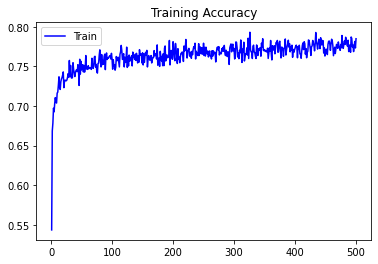

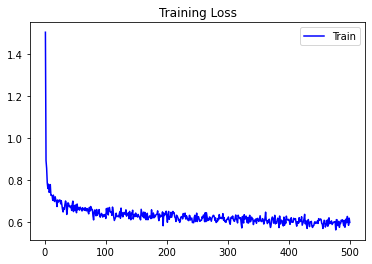

In [30]:
import matplotlib.pyplot as plt
acc += history.history['accuracy']
loss += history.history['loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'b', label = 'Train')
plt.title("Training Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b', label = 'Train')
plt.title("Training Loss")

plt.legend()
plt.show()

In [31]:
 #test result
 test = model.evaluate(testing_flow)

129/129 [==============================] - 17s 129ms/step - loss: 0.5882 - accuracy: 0.7997
